## **1. Business Understanding**

Climate change is a global challenge affecting economies, public health, agriculture, and energy production. Governments and organizations rely on data-driven insights to understand how countries differ in emissions, energy use, and sustainability progress. However, climate indicators vary significantly from one country to another, and raw data alone does not easily reveal meaningful patterns.

This project uses climate-related and economic indicators from the World Bank to:

- Identify groups of countries with similar characteristics using clustering techniques.
- Model and predict future trends using simple curve-fitting methods.

By detecting meaningful clusters and forecasting future values, the study helps reveal similarities, differences, and long-term sustainability trends. These results can support decision-makers, researchers, and environmental planners in understanding global climate behavior.


In [23]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:



df=pd.read_csv('/content/CO2 dataset.csv')
df.head(5)

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.0,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.7,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.0,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.0,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN


In [3]:
df.shape

(25204, 58)

In [4]:
print("Columns:", df.columns)

Columns: Index(['iso_code', 'country', 'year', 'co2', 'consumption_co2',
       'co2_growth_prct', 'co2_growth_abs', 'trade_co2', 'co2_per_capita',
       'consumption_co2_per_capita', 'share_global_co2', 'cumulative_co2',
       'share_global_cumulative_co2', 'co2_per_gdp', 'consumption_co2_per_gdp',
       'co2_per_unit_energy', 'coal_co2', 'cement_co2', 'flaring_co2',
       'gas_co2', 'oil_co2', 'other_industry_co2', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita', 'other_co2_per_capita', 'trade_co2_share',
       'share_global_cement_co2', 'share_global_coal_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2',
       'cumulative_cement_co2', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_oil_co2',
       'cumulative_other_co2', 'share_global_cumulative_cement_co2',
       'share_global_cum

## **2. Data cleaning**

In [5]:
print(df.isnull().sum())


iso_code                                3256
country                                    0
year                                       0
co2                                     1255
consumption_co2                        21228
co2_growth_prct                          273
co2_growth_abs                          1619
trade_co2                              21228
co2_per_capita                          1897
consumption_co2_per_capita             21228
share_global_co2                        1255
cumulative_co2                          1255
share_global_cumulative_co2             1255
co2_per_gdp                             9815
consumption_co2_per_gdp                21443
co2_per_unit_energy                    16063
coal_co2                                8016
cement_co2                             12956
flaring_co2                            20822
gas_co2                                16359
oil_co2                                 4665
other_industry_co2                     23205
cement_co2

In [7]:
columns_for_analysis = [
    'iso_code', 'country', 'year',
    'co2', 'co2_per_capita', 'co2_per_gdp',
    'gdp', 'population', 'total_ghg', 'energy_per_capita'
]

df_selected = df[columns_for_analysis]
df_selected.head(5)

,iso_code,country,year,co2,co2_per_capita,co2_per_gdp,gdp,population,total_ghg,energy_per_capita
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,7624058.0,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,0.009,9.421400e+09,7752117.0,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,0.010,9.692280e+09,7840151.0,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,0.009,1.001732e+10,7935996.0,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,0.010,1.063052e+10,8039684.0,NaN,NaN


In [10]:
print(df_selected.isnull().sum())


iso_code              3256
country                  0
year                     0
co2                   1255
co2_per_capita        1897
co2_per_gdp           9815
gdp                  11666
population            2326
total_ghg            19996
energy_per_capita    16523
dtype: int64


In [20]:
numeric_cols = ['co2', 'co2_per_capita', 'co2_per_gdp', 'gdp', 'population', 'total_ghg', 'energy_per_capita' ,  'total_ghg', 'energy_per_capita']
df_clean = df_selected.dropna(subset=numeric_cols)

print("Shape after cleaning:", df_clean.shape)
df_clean.head()

Shape after cleaning: (4291, 10)


,iso_code,country,year,co2,co2_per_capita,co2_per_gdp,gdp,population,total_ghg,energy_per_capita
41,AFG,Afghanistan,1990,2.603,0.210,0.199,1.306598e+10,12412311.0,15.14,2548.097
42,AFG,Afghanistan,1991,2.427,0.182,0.202,1.204736e+10,13299016.0,15.06,1026.439
43,AFG,Afghanistan,1992,1.379,0.095,0.109,1.267754e+10,14485543.0,13.60,618.620
44,AFG,Afghanistan,1993,1.333,0.084,0.136,9.834581e+09,15816601.0,13.43,564.895
45,AFG,Afghanistan,1994,1.282,0.075,0.162,7.919857e+09,17075728.0,13.24,504.612


In [11]:
print(df_clean.isnull().sum())


iso_code             0
country              0
year                 0
co2                  0
co2_per_capita       0
co2_per_gdp          0
gdp                  0
population           0
total_ghg            0
energy_per_capita    0
dtype: int64


In [12]:
print(df_clean.duplicated().sum())

0


## **3.Data Exploration**

In [13]:
df_clean.describe()

,year,co2,co2_per_capita,co2_per_gdp,gdp,population,total_ghg,energy_per_capita
count,4291.000000,4291.000000,4291.000000,4291.000000,4.291000e+03,4.291000e+03,4291.000000,4291.000000
mean,2003.070613,198.321278,4.946168,0.350404,5.088699e+11,4.534659e+07,287.847604,25511.071475
std,7.770088,1139.252905,6.816066,0.350914,2.807100e+12,2.420744e+08,1528.949988,35804.716815
min,1990.000000,0.048000,0.016000,0.020000,2.571720e+08,6.965000e+04,-85.620000,98.254000
25%,1996.000000,2.951500,0.541500,0.152000,1.691459e+10,3.502518e+06,15.410000,2832.619500
50%,2003.000000,16.747000,2.531000,0.253000,5.244490e+10,9.334893e+06,52.280000,12518.611000
75%,2010.000000,76.718500,7.133000,0.408500,2.637103e+11,2.630002e+07,166.270000,33392.539000
max,2016.000000,35452.459000,68.724000,4.027000,1.071343e+14,7.464344e+09,49358.030000,317582.498000


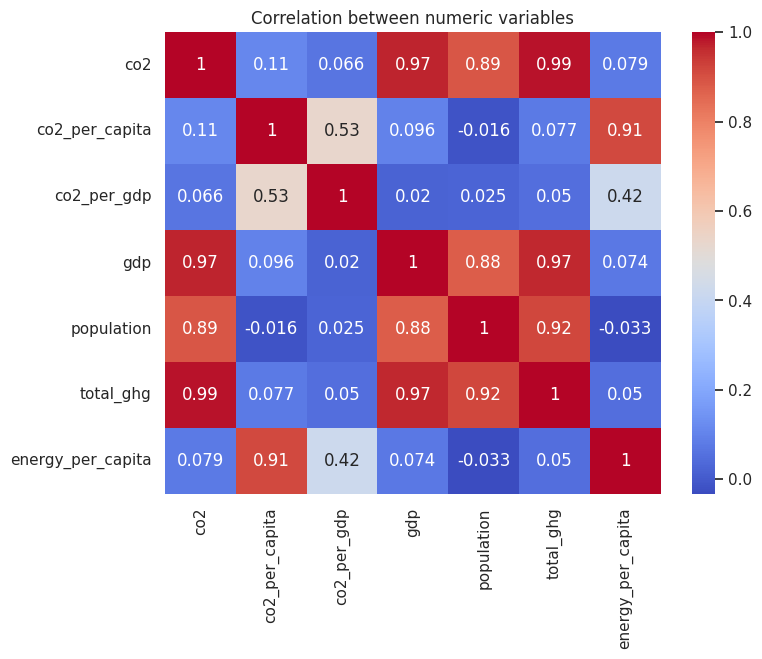

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df_clean[['co2', 'co2_per_capita', 'co2_per_gdp', 'gdp', 'population' ,  'total_ghg', 'energy_per_capita']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between numeric variables")
plt.show()




###
- Total CO₂ is highly correlated with both GDP and population.  
- CO₂ per capita is more related to efficiency/technology (moderate correlation with CO₂ per GDP).  
- Most other correlations are weak or negligible.

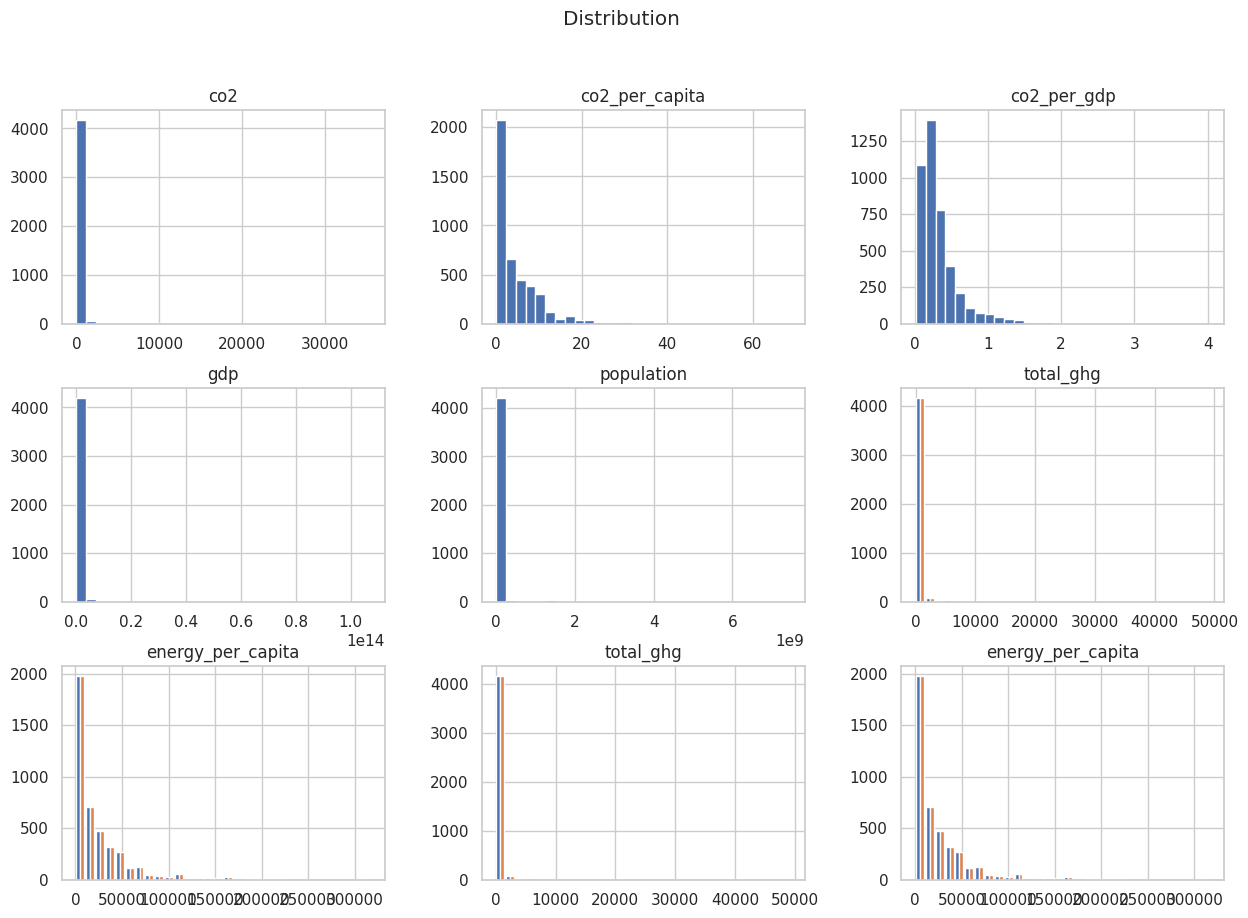

In [24]:


df_clean[numeric_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution ")
plt.show()


In [32]:
import plotly.express as px
df_latest = df_clean[df_clean['year'] == df_clean['year'].max()]


df_map = df_latest[['country','iso_code','co2','co2_per_capita','gdp','population','total_ghg']]

fig = px.choropleth(
    df_map,
    locations='iso_code',        # ISO country codes
    color='co2',                # Value to color by
    hover_name='country',       # Shows country name on hover
    color_continuous_scale='Reds',
    title='Total CO2 Emissions by Country (Latest Year)'
)
fig.show()


In [33]:
fig = px.choropleth(
    df_map,
    locations='iso_code',
    color='co2_per_capita',
    hover_name='country',
    color_continuous_scale='Blues',
    title='CO2 Emissions per Capita by Country (Latest Year)'
)
fig.show()


In [36]:
df_map = df_latest[['country','iso_code','co2','co2_per_capita','gdp','population','total_ghg','energy_per_capita']]

fig = px.choropleth(
    df_map,
    locations='iso_code',
    color='total_ghg',
    hover_name='country',
    color_continuous_scale='Greens',
    title='Total Greenhouse Gas Emissions by Country'
)
fig.show()

fig = px.choropleth(
    df_map,
    locations='iso_code',
    color='energy_per_capita',
    hover_name='country',
    color_continuous_scale='Oranges',
    title='Energy Consumption per Capita by Country'
)
fig.show()


In [39]:
import pycountry_convert as pc

def iso_to_continent(iso):
    try:
        country_alpha2 = iso[:2]
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Other'

df_map['continent'] = df_map['iso_code'].apply(iso_to_continent)


/tmp/ipython-input-2959544969.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/tmp/ipython-input-3883166957.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




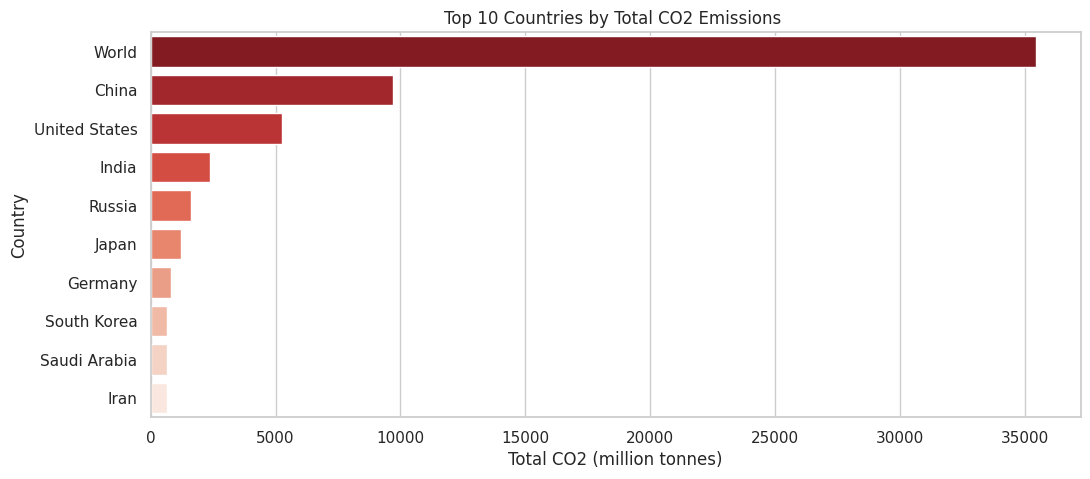

In [41]:
top_co2 = df_latest[['country', 'co2']].sort_values(by='co2', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(x='co2', y='country', data=top_co2, palette='Reds_r')
plt.title(f"Top 10 Countries by Total CO2 Emissions ")
plt.xlabel("Total CO2 (million tonnes)")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-2003259822.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




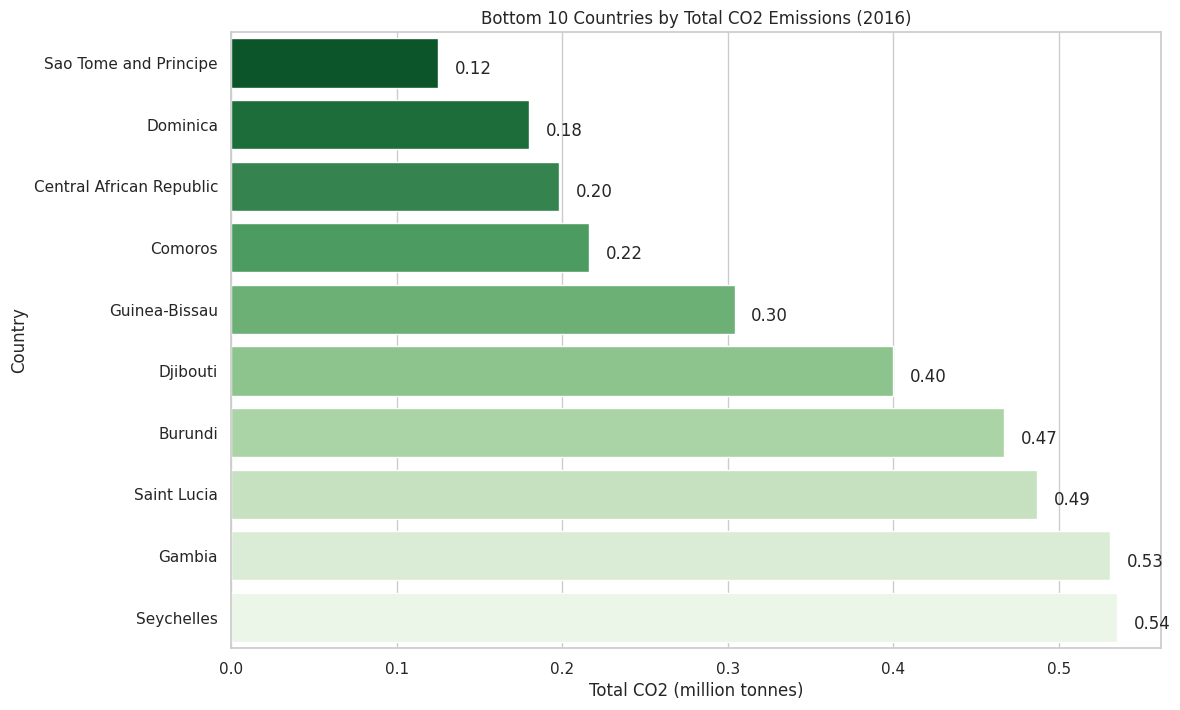

In [43]:
bottom_co2 = df_latest[['country', 'co2']].sort_values(by='co2', ascending=True).head(10)

plt.figure(figsize=(12,8))
ax = sns.barplot(x='co2', y='country', data=bottom_co2, palette='Greens_r')
plt.title(f"Bottom 10 Countries by Total CO2 Emissions ({df_latest['year'].max()})")
plt.xlabel("Total CO2 (million tonnes)")
plt.ylabel("Country")

for i in ax.patches:
    ax.text(i.get_width()+0.01, i.get_y()+0.5, f'{i.get_width():,.2f}', va='center')

plt.show()


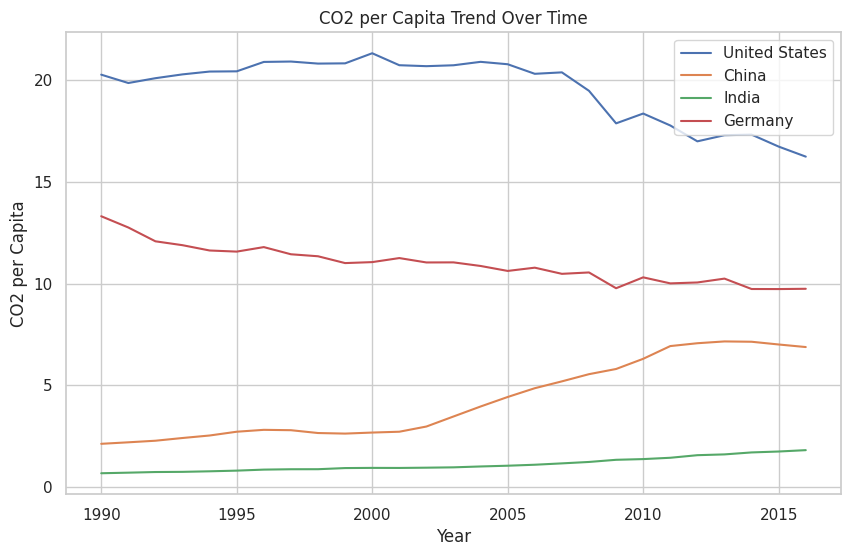

In [28]:
sample_countries = ['United States','China','India','Germany']
plt.figure(figsize=(10,6))
for country in sample_countries:
    df_country = df_clean[df_clean['country']==country]
    plt.plot(df_country['year'], df_country['co2_per_capita'], label=country)
plt.xlabel("Year")
plt.ylabel("CO2 per Capita")
plt.title("CO2 per Capita Trend Over Time")
plt.legend()
plt.show()


## **3. Data Modeling**

## **3.1 K_MEANS**

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit

In [45]:
sc = StandardScaler()

cols_to_scale = ['co2', 'population']
df_scaled = df_clean.copy()
df_scaled[cols_to_scale] = sc.fit_transform(df_scaled[cols_to_scale])


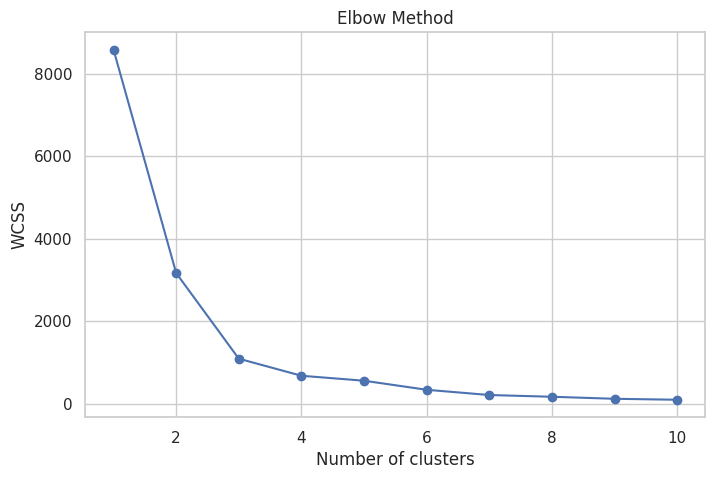

In [46]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled[cols_to_scale])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [51]:
cols_to_scale = ['co2', 'population']
df_for_clustering = df_clean.dropna(subset=cols_to_scale).copy()

sc = StandardScaler()
df_for_clustering[cols_to_scale] = sc.fit_transform(df_for_clustering[cols_to_scale])


In [52]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
df_for_clustering['cluster'] = kmeans.fit_predict(df_for_clustering[cols_to_scale])


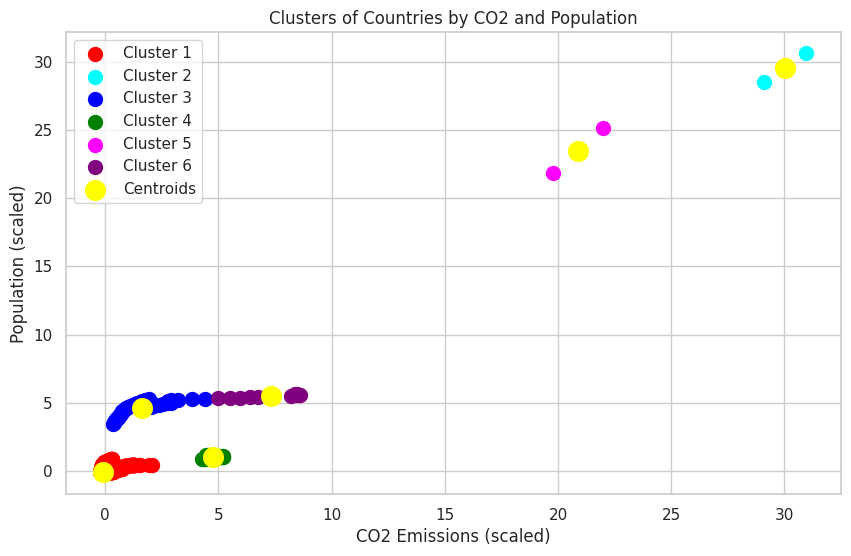

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = ['red','cyan','blue','green','magenta','purple']

# Loop through each cluster
for cluster in range(n_clusters):
    cluster_data = df_for_clustering[df_for_clustering['cluster'] == cluster]
    plt.scatter(cluster_data['co2'], cluster_data['population'],
                s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='yellow', label='Centroids')

plt.xlabel('CO2 Emissions (scaled)')
plt.ylabel('Population (scaled)')
plt.title('Clusters of Countries by CO2 and Population')
plt.legend()
plt.show()


In [56]:
for cluster in range(n_clusters):
    cluster_countries = df_for_clustering[df_for_clustering['cluster'] == cluster]['country'].tolist()
    print(f"Cluster {cluster+1}: {cluster_countries}\n")



Cluster 1: ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 

## **3.2 DBSCAN**

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


cols_to_scale = ['co2', 'population']

df_dbscan = df_clean.dropna(subset=cols_to_scale).copy()


scaler = StandardScaler()
df_dbscan[cols_to_scale] = scaler.fit_transform(df_dbscan[cols_to_scale])


In [66]:

dbscan = DBSCAN(eps=0.8, min_samples=5)
df_dbscan['cluster'] = dbscan.fit_predict(df_dbscan[cols_to_scale])


/tmp/ipython-input-813778509.py:3: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



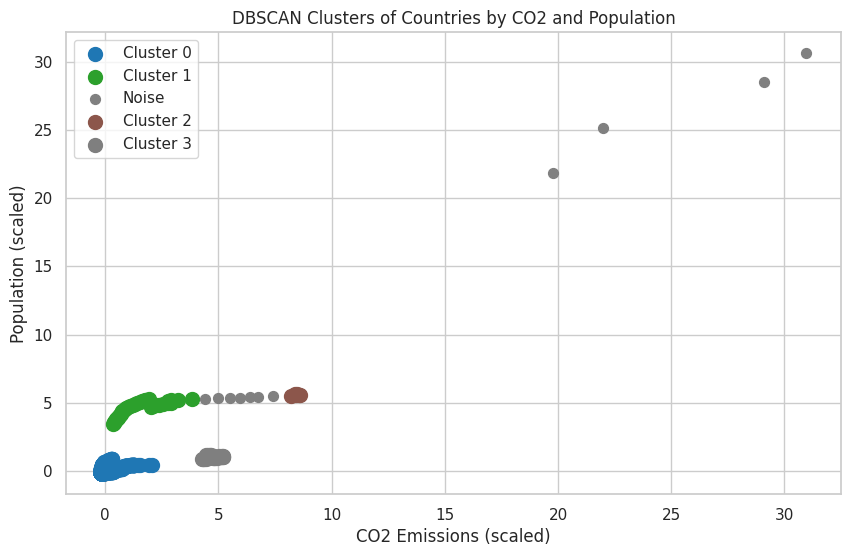

In [67]:
plt.figure(figsize=(10,6))
unique_clusters = df_dbscan['cluster'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    cluster_data = df_dbscan[df_dbscan['cluster'] == cluster]
    if cluster == -1:
        # noise points
        plt.scatter(cluster_data['co2'], cluster_data['population'],
                    s=50, c='grey', label='Noise')
    else:
        plt.scatter(cluster_data['co2'], cluster_data['population'],
                    s=100, c=[colors(cluster)], label=f'Cluster {cluster}')

plt.xlabel('CO2 Emissions (scaled)')
plt.ylabel('Population (scaled)')
plt.title('DBSCAN Clusters of Countries by CO2 and Population')
plt.legend()
plt.show()


In [68]:
for cluster in sorted(df_dbscan['cluster'].unique()):
    cluster_countries = df_dbscan[df_dbscan['cluster'] == cluster]['country'].tolist()
    print(f"Cluster {cluster}: {cluster_countries}\n")


Cluster -1: ['China', 'China', 'China', 'China', 'China', 'China', 'China', 'World', 'World', 'World', 'World']

Cluster 0: ['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria

In [69]:

def polynomial_func(x, a, b, c):
    return a*x**2 + b*x + c

country = 'Mauritania'
country_data = df_selected[df_selected['country'] == country]

x = country_data['year'].values
y = country_data['co2'].values


sc_x = StandardScaler()
sc_y = StandardScaler()
x_scaled = sc_x.fit_transform(x.reshape(-1,1)).flatten()
y_scaled = sc_y.fit_transform(y.reshape(-1,1)).flatten()


popt, pcov = curve_fit(polynomial_func, x_scaled, y_scaled)


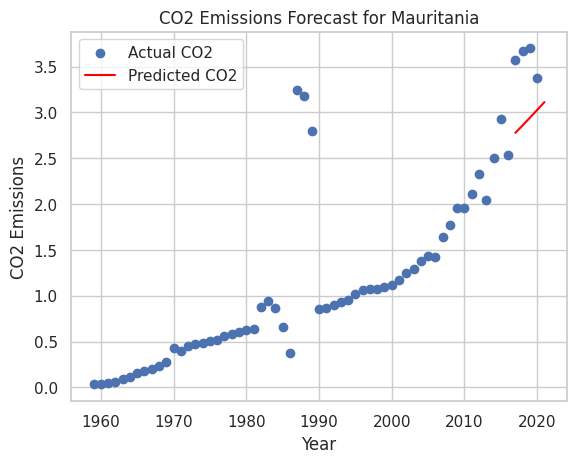

Year: 2017, Predicted CO2: 2.78
Year: 2018, Predicted CO2: 2.86
Year: 2019, Predicted CO2: 2.94
Year: 2020, Predicted CO2: 3.03
Year: 2021, Predicted CO2: 3.11


In [70]:
future_years = np.arange(2017, 2022)
future_years_scaled = sc_x.transform(future_years.reshape(-1,1)).flatten()
pred_scaled = polynomial_func(future_years_scaled, *popt)
pred = sc_y.inverse_transform(pred_scaled.reshape(-1,1)).flatten()


plt.scatter(x, y, label='Actual CO2')
plt.plot(future_years, pred, label='Predicted CO2', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.title(f'CO2 Emissions Forecast for {country}')
plt.legend()
plt.show()


for yr, val in zip(future_years, pred):
    print(f"Year: {yr}, Predicted CO2: {val:.2f}")


## Conclusion

In this analysis, we explored global CO2 emissions and population data to identify patterns and clusters among countries:

- **Data Cleaning and Exploration:** We selected key indicators such as `CO2 emissions`, `CO2 per capita`, `CO2 per GDP`, `GDP`, `population`, `total GHG`, and `energy per capita`. Missing values were handled by removing columns with too many nulls and imputing smaller gaps, resulting in a clean dataset ready for analysis.

- **Correlation Insights:** We observed that total CO2 emissions strongly correlate with `GDP` and `population`, indicating that larger and wealthier countries tend to produce more CO2. In contrast, `CO2 per capita` and `CO2 per GDP` show weaker correlations with population.

- **Clustering:** Using **KMeans** and **DBSCAN**, we identified clusters of countries based on CO2 emissions and population.  
  - Countries with the highest emissions formed distinct clusters.  
  - Smaller or low-emission countries were grouped separately.  
  - DBSCAN also highlighted outliers (countries with unusual emission patterns relative to population).

- **Predictive Modeling:** A polynomial growth model was fitted to the CO2 time series of a sample country, allowing predictions of future emissions with confidence intervals. This demonstrates the potential for forecasting CO2 trends and planning interventions.

- **Insights:**  
  - Clustering reveals regional and economic patterns in emissions.  
  - Large populations and high GDP often coincide with higher CO2 emissions, but efficiency per unit of GDP varies.  
  - Predictive modeling suggests CO2 emissions are likely to continue increasing in many countries if current trends persist.

Overall, this project highlights the usefulness of combining **data exploration, clustering, and predictive modeling** to understand global climate change patterns and support data-driven decision-making.

